# Assignment 2 gradient descent, backpropagation, cross-entropy loss FCN

# Problem 1 gradient descent

## geometric interpretation

**Provide a geometric interpretation of gradient descent in the one-dimensional case.**

- Suppose we have a cost function $C: \mathbb{R} \rightarrow \mathbb{R} $ which is continuous and differentiable,

    to find the minimum of $C$, we randomly start at a point $x_i$ (a value of our parameter $x$),
    
    the formula of gradient descent gives that the updated value of parameter is $x_{i+1} \leftarrow x_i - \eta \nabla C_x$, where $\eta$ is learning rate.
    
    because we are in 1D, the gradient of $C$ w.r.t $x$ is just derivative of $C$ w.r.t $x$, thus $x_{i+1} \leftarrow x_i - \eta C'(x_i)$.
    
    when $x_i < x_0$, $C'(x_i) <0$, $x_{i+1}$ will increase
    
    when $x_i > x_0$, $C'(x_i) >0$, $x_{i+1}$ will decrease
    
    in each case, $C$ will always decrease and reach the minimum.

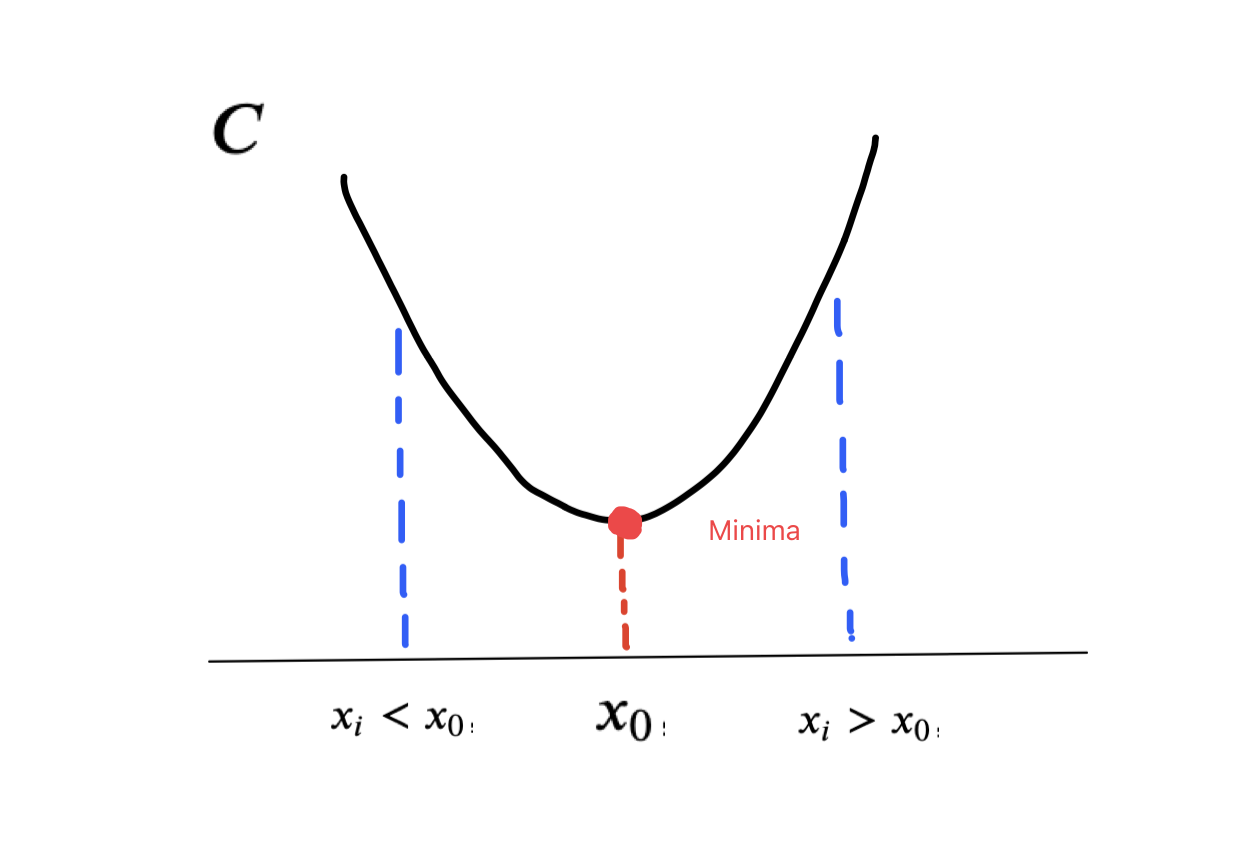

## online learning

online or incremental learning: An extreme version of gradient descent is to use a mini-batch size of just 1 just as human beings do. 
    
Name one advantage and one disadvantage of online learning compared to stochastic gradient descent with a mini-batch size of, say, 20


- Advantage of online learning: 

    1. computationally fast because only one training sample is processed at a time.
    
    2. memory efficient because only one training sample is stored at a time.
    
    3. more easy to avoid local minimum because steps taken towards minima of loss function have oscillations such like shooting back and forth


- Disadvantage of online learning: unstable

    1. inaccurate learning because the steps taken towards the minima are noisy which leads to inaccurate direction
    
    2. slow convergence because the noisy steps
    
    3. computationally expensive because it doesn't take advantage of vectorized operations and parallel computing

# problem 2 backpropagation

## a single modified neuron

1.	Backpropagation with a single modified neuron (Nielsen book, chapter 2)

    Suppose we modify a single neuron in  a feedforward  network so that the output from the  neuron  is given by $f(\sum_j w_j x_j + b)$, where f is some function other than the sigmoid. 
    
    How should we modify the backpropagation algorithm in this case?


**if the modified neuron is $j$-th neuron on $l$-th hidden layer**

1. input $x$: set the corresponding activation $a^l$ for the input layer
    
    
2. feedforward: for each $l=2, 3,..., L$ compute $z^l = w^l a^{l-1}+b^l$ and
    
$$
a_i^l = \left\{\begin{matrix}
\sigma(z_i^l) & i \neq j \\
f(z_i^l) & i = j \\
\end{matrix}\right.
$$


3. output error $\delta^L = \nabla_{a^L} C \odot \sigma'(z^L)$


4. backpropagate the error: for each $l = L-1, L-2,...,2$ compute

$$
\delta_i^l = \left\{\begin{matrix}
\left [ (w_i^{l+1})^T \delta_i^{l+1}\right ] \sigma'(z_i^l) & i \neq j \\ 
\left [ (w_i^{l+1})^T \delta_i^{l+1}\right ] f'(z_i^l) & i = j \\ 
\end{matrix}\right.
$$

5. output: gradient of cost function $\frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1} \delta_j^l$ and $\frac{\partial C}{\partial b_{j}^l} = \delta_j^l$

**if the modified neuron is $j$-th neuron on $L$-th output layer**

1. input $x$: set the corresponding activation $a^l$ for the input layer
    
    
2. feedforward: for each $l=2, 3,..., L$ compute $z^l = w^l a^{l-1}+b^l$ and
    
$$
a_i^l = \left\{\begin{matrix}
\sigma(z_i^l) & i \neq j \\
f(z_i^l) & i = j \\
\end{matrix}\right.
$$


3. output error

$$
\delta_i^L = \left\{\begin{matrix}
\frac{\partial C}{\partial a_{i}^L} \sigma'(z_i^L) & i \neq j \\ 
\frac{\partial C}{\partial a_{i}^L} f'(z_i^L) & i = j \\ 
\end{matrix}\right.
$$


4. backpropagate the error: for each $l = L-1, L-2,...,2$ compute $\delta^l = \left [ (w^{l+1})^T \delta^{l+1} \right ] \odot \sigma'(z^l)$


5. output: gradient of cost function $\frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1} \delta_j^l$ and $\frac{\partial C}{\partial b_{j}^l} = \delta_j^l$

## softmax and log-likelihood cost

Consider backpropagation algorithm for a network with **a final softmax layer**

Show that error $\delta_j^L = \partial C/\partial z_j^L$ in the  final layer is $\delta_j^L = a_j^L-y_j$, i.e., log-likelihood cost
 

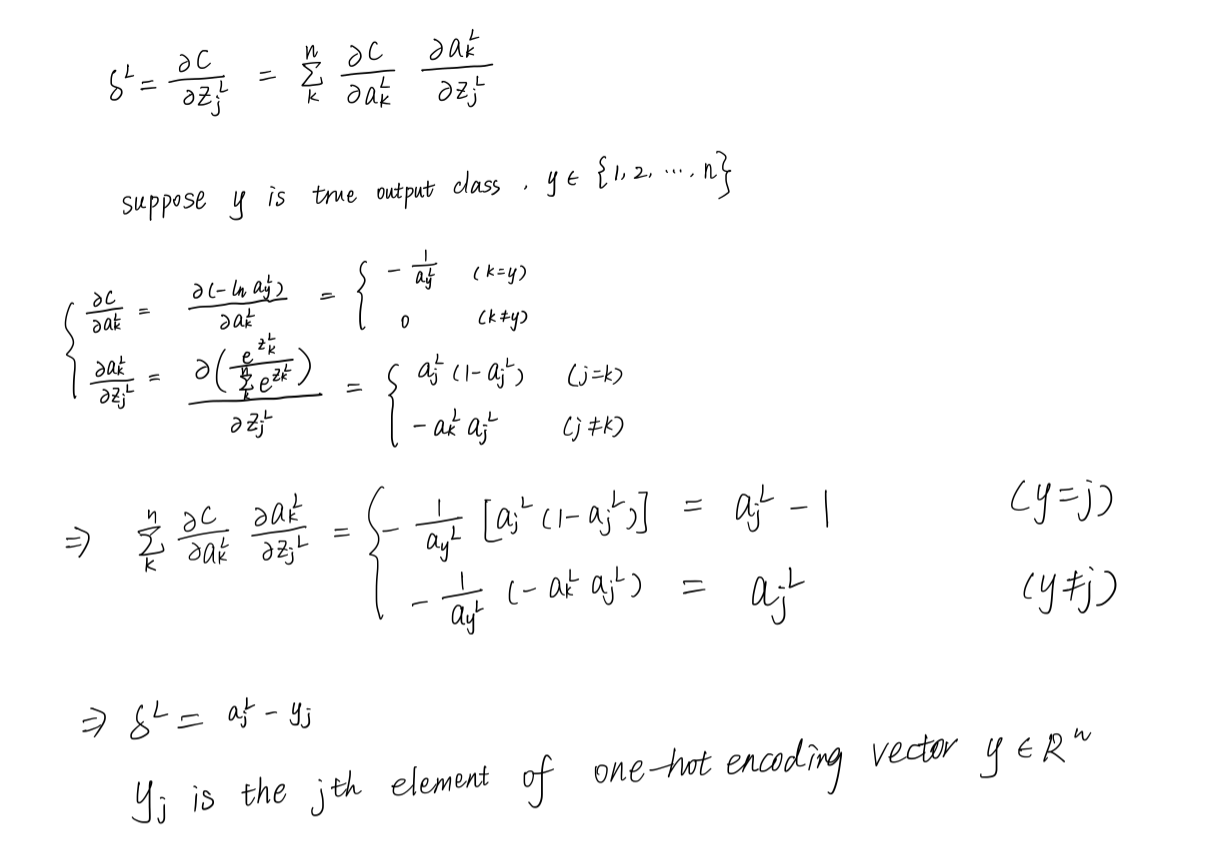

**Where does the softmax name come from?** (Nielsen book, chapter 3)

In classification problems, where softmax is used, typically there is one outcome having the maximum value, i.e. its probability is bigger than the others. 

So the output vector is a one-hot encoding vector with one element of 1 and all the others of 0. 

softmax is a function that maximize the maximum value(s) by format of probability, the biggest possible value is 1.

it is "soft" because it is differentiable at all points for all elements of the input vector compared to the max function $max(0,𝑥)$  which is continuous but isn't differentiable at $𝑥=0$.

## linear neurons

Backpropagation with linear neurons (Nielsen book, chapter 2)

Suppose we replace the usual non-linear activation function (sigmoid) with $\sigma(z) = z$ throughout the network. 

Rewrite the backpropagation algorithm for this case.


$\sigma(z) = z \rightarrow \sigma'(z) = 1$

1. input $x$: set the corresponding activation $a^l$ for the input layer
    
    
2. feedforward: for each $l=2, 3,..., L$ compute $z^l = w^l a^{l-1}+b^l$ and $a^l = z^l$


3. output error $\delta^L = \nabla_{a^L} C$


4. backpropagate the error: for each $l = L-1, L-2,...,2$ compute $\delta^{l}=(w^{l+1})^T\delta^{l+1}$


5. output: gradient of cost function $\frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1} \delta_j^l$ and $\frac{\partial C}{\partial b_{j}^l} = \delta_j^l$

## Alternate equations of backpropagation

### error in final layer

- Show that error in final layer $\delta^L = \nabla_{a^L} C \odot \sigma'(z^L)$ can be written as $\delta^L = \Sigma'(z^L) \nabla_{a^L} C$

    where $\Sigma'(z^L)$ is a square matrix whose diagonal entries are the values $\sigma'(z^L)$ and whose off-diagonal entries are 0.

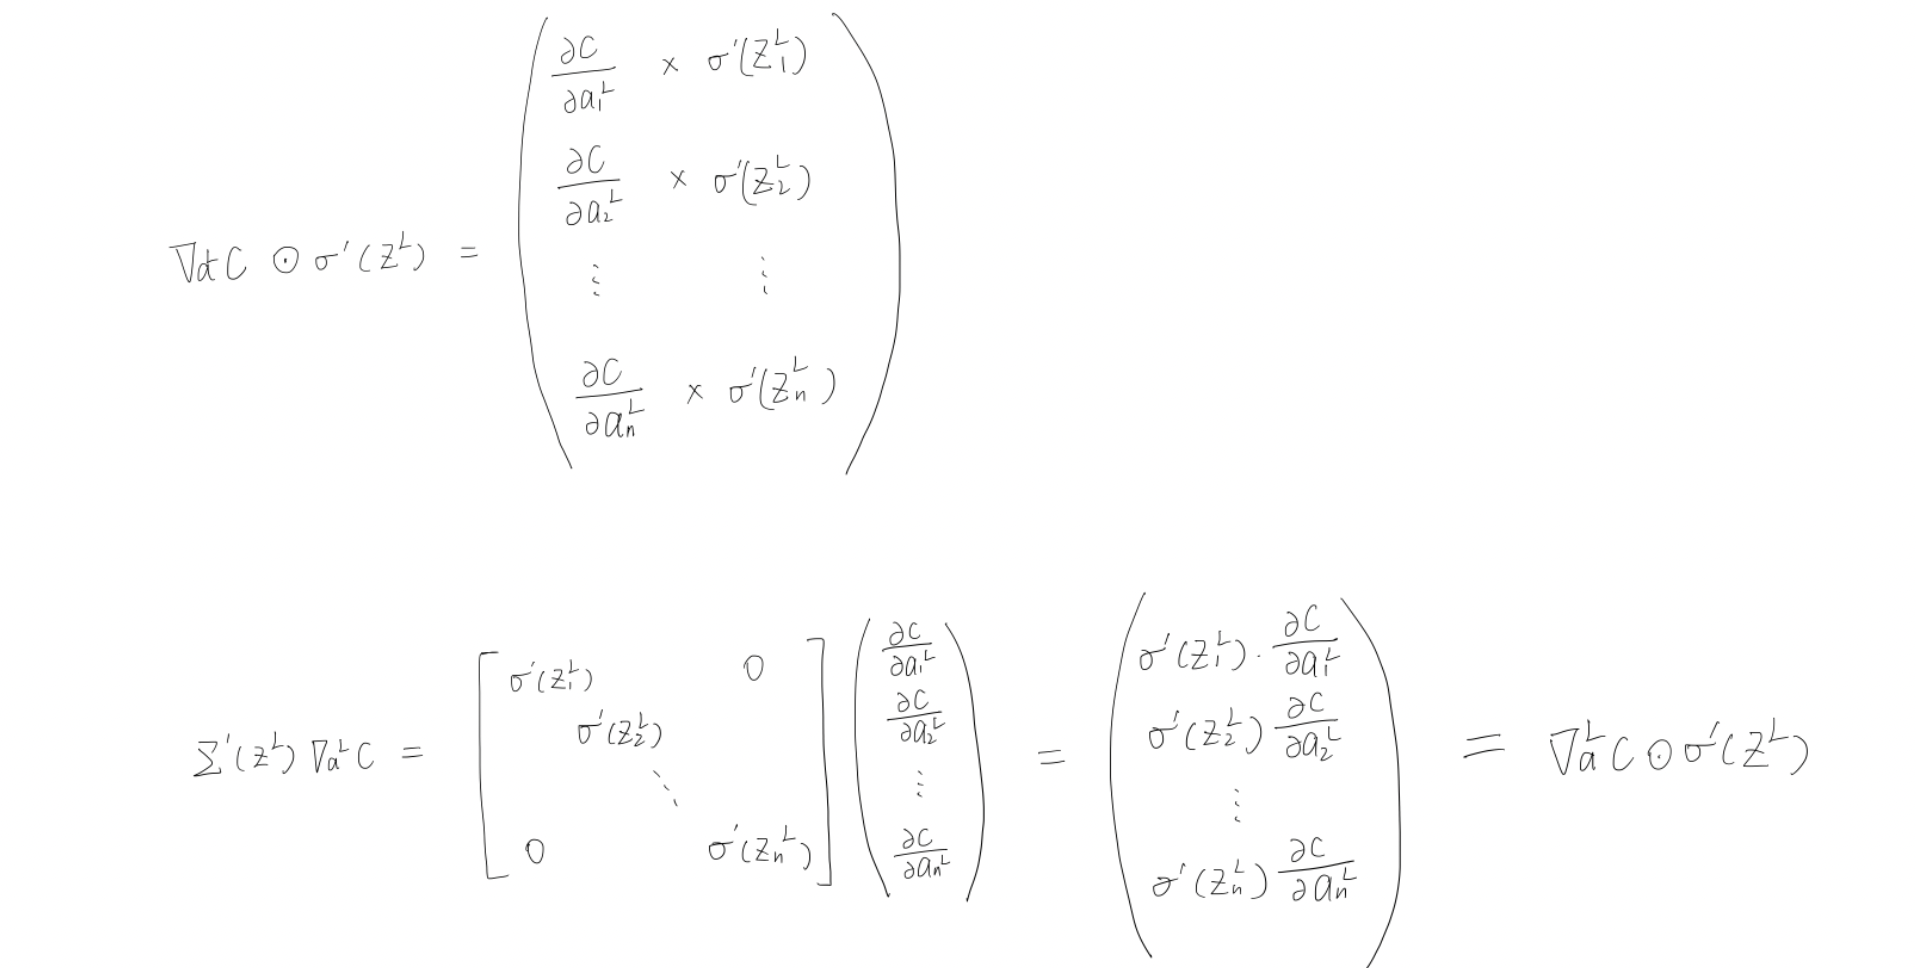

### error in layer $l$

show that error in layer $l$

$$
\delta^l = \left[(w^{l+1})^T \delta^{l+1} \right] \odot \sigma'(z^l)
$$

can be written as 

$$
\delta^l = \Sigma'(z^l) (w^{l+1})^T  \delta^{l+1}
$$

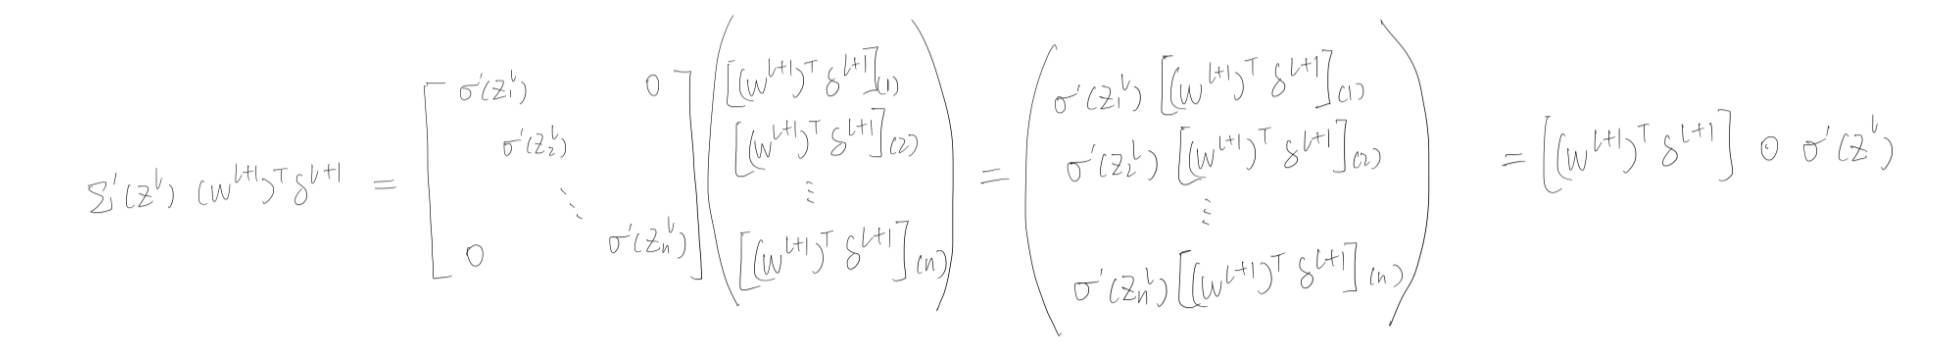

### error in layer  𝑙: combine 1 and 2

- By combining the results from 1 and 2, show that

$$
\delta^l = \Sigma'(z^l) (w^{l+1})^T ...\Sigma'(z^{L-1}) (w^L)^T \Sigma'(z^L) \nabla_{a^L} C
$$

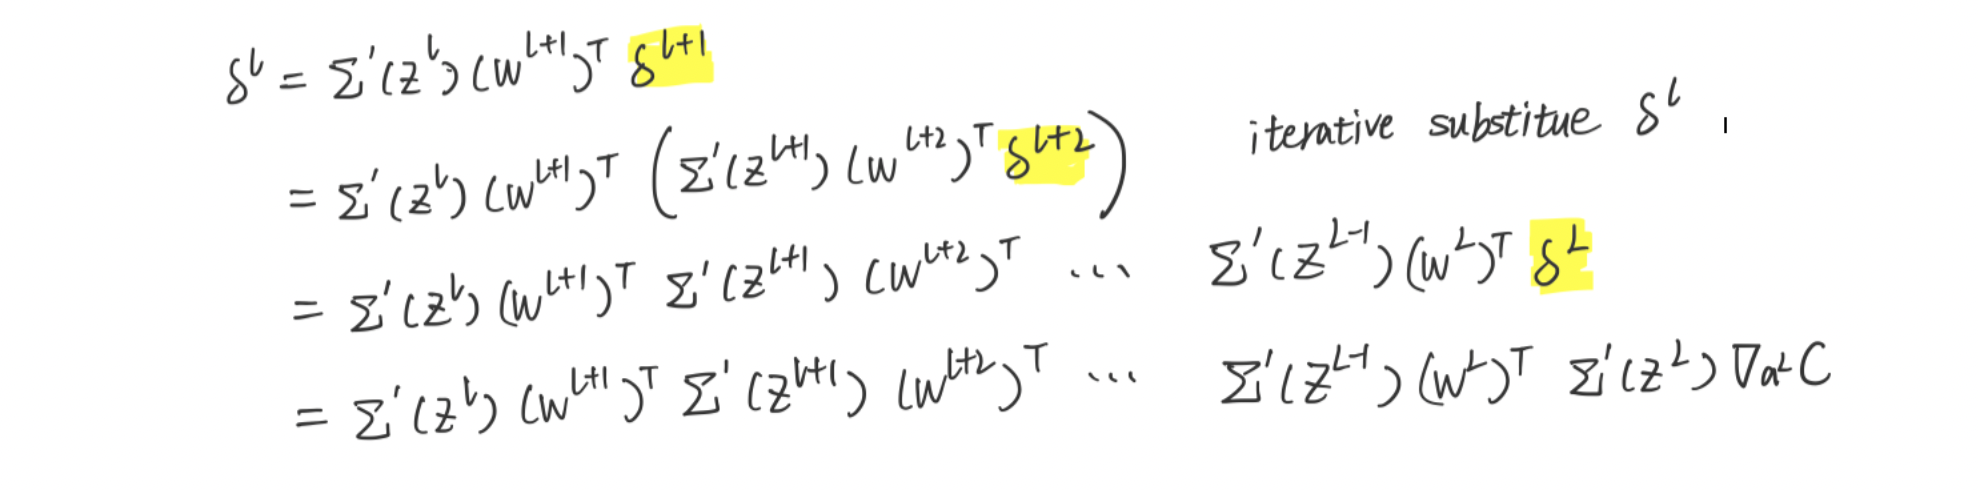

# problem 3 cross-entropy loss

##  roles of ys and as 

1.	It can be difficult at first to remember the respective roles of the ys and the as for cross-entropy. (Nielsen book, chapter 3)

    It 's easy to get confused about whether the right form is 
    
    $$- [y \ln a + (1 - y)\ln(1 -  a)] \text{OR} \ - [a \ln y + (1 -  a) \ln (1 -  y)]$$
    
- What happens to the second of these expressions when y = 0 or 1? 
    
    because $\ln 0$ is undefined, the second expression is undefined when y = 0 or 1.
    
$$
- [a \ln y + (1 -  a) \ln (1 -  y)]=\left\{\begin{matrix}
-\left [ a \ln 0  + (1-a) \ln a\right ] & y=0 \\
-(1-a) \ln 0 &  y=1\\
\end{matrix}\right.
$$
    
    
    
- Does this problem affect the first expression? Why or why not? 

    Not because the first expression is defined when y = 0 or 1.

$$
- [y \ln a + (1 - y)\ln(1 -  a)] =\left\{\begin{matrix}
-\ln (1-a) & y=0 \\
-\ln a  &  y=1\\
\end{matrix}\right.
$$

## $\sigma(z) = y$

Show that the cross-entropy is still minimized when $\sigma(z) = y$ for all training inputs (i.e. even when $y \in (0,1)$).  (Nielsen book, chapter 3)

When this is the case the cross-entropy has the value:  

$$
C = -\frac{1}{n} \sum_x[  y \ln y + (1 - y) \ln(1 - y)]
$$



- take derivative of cross-entropy loss $C = -\frac{1}{n} \sum_x [y \ln a + (1 - y)\ln(1 -  a)]$ w.r.t activation $a$

    $$
    \frac{\partial C}{\partial a} = -\frac{1}{n} \sum_x \left ( \frac{y}{a}-\frac{1-y}{1-a} \right )
    $$
    
    plug in $a = \sigma(z)=y$, we have 
    
    $$
    \frac{\partial C}{\partial a} = -\frac{1}{n} \sum_x \left (1-1 \right ) = 0
    $$
    
    thus $C$ is minimized when $a=y$

## calculate gradient

Given the network in  Figure 1,  calculate the  derivatives of  the  cost with respect to the weights and the biases and the backpropagation error equations (i.e. $\delta^l$ for each layer l) for the first iteration using the cross-entropy cost function. 

use sigmoid activation function on hl, h2, o1, and o2. 

Initial weights are colored in red, initial biases are colored in orange, the training inputs and desired outputs are in blue. 

This problem aims to optimize the weights and biases through backpropagation to make the network output the desired results.

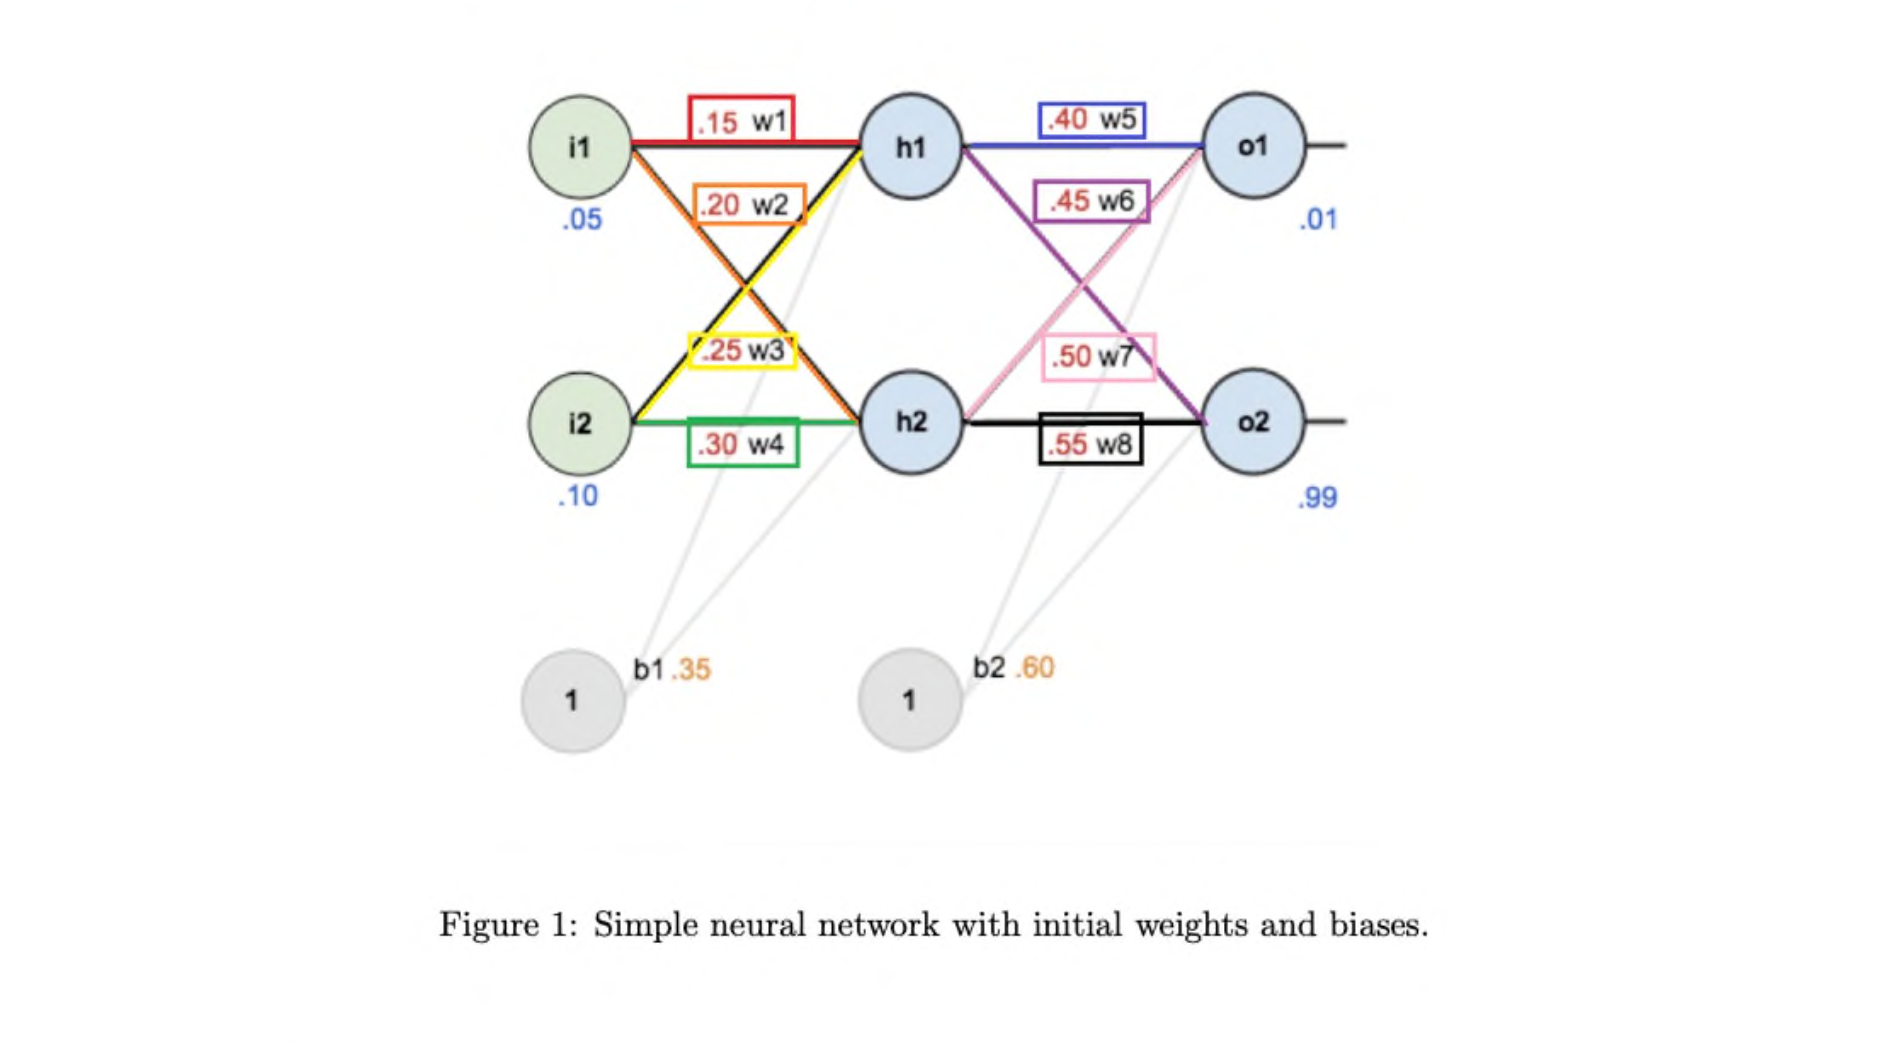

$\sigma'(x) = \sigma(x)(1-\sigma(x)) $

1. input $x = \begin{bmatrix}
0.05 \\ 0.10
\end{bmatrix}$

    
2. feedforward: for each $l=1, 2 (L=2)$ compute $z^l = w^l a^{l-1}+b^l$ and $a^l = \sigma(z^l)$

    $z^1 = \begin{bmatrix}
0.3825 \\ 0.39
\end{bmatrix}$ $a^1 = \begin{bmatrix}
0.59447593 \\ 0.5962827
\end{bmatrix}$

    $z^2 = \begin{bmatrix}
1.13593172 \\ 1.19546965
\end{bmatrix}$ $a^2 = \begin{bmatrix}
0.75693192 \\ 0.76771788
\end{bmatrix}$

3. output error at final layer $\delta^2 = \nabla_{a^2} C \odot \sigma'(z^2)=\begin{bmatrix}
0.74693192 \\ -0.22228212
\end{bmatrix}$

    $
\delta_i^L =  -\left ( \frac{y_i}{a_i^L}-\frac{1-y_i}{1-a_i^L} \right )  \left[\sigma(z_i^L)(1- \sigma(z_i^L))\right] =  -\left ( \frac{y_i}{a_i^L}-\frac{1-y_i}{1-a_i^L} \right ) \left[a_i^L(1- a_i^L)\right] = a_i^L (1-y_i)-(1-a_i^L) y_i
$


4. backpropagate the error: $\delta^1 = \left [ (w^{L})^T \delta^{2} \right ] \odot \sigma'(z^2)
=\begin{bmatrix}
0.03452161 \\ 0.03813779
\end{bmatrix}$


5. output: gradient of cost function 

$\frac{\partial C}{\partial w_{jk}^2} = a_k^{1} \delta_j^2 \Rightarrow \frac{\partial C}{\partial w^2} = \begin{bmatrix}
0.44403305 & 0.44538258 \\
-0.13214137 & -0.13254298 \\
\end{bmatrix}$

$\frac{\partial C}{\partial b_{j}^2} = \delta_j^2 \Rightarrow \frac{\partial C}{\partial b^2}=\begin{bmatrix}
0.74693192 \\ -0.22228212
\end{bmatrix}$

$\frac{\partial C}{\partial w_{jk}^1} = a_k^{0} \delta_j^1 \Rightarrow \frac{\partial C}{\partial w^1} = \begin{bmatrix}
0.00172608 & 0.00345216 \\
0.00190689 & 0.00381378 \\
\end{bmatrix}$


$\frac{\partial C}{\partial b_{j}^1} = \delta_j^1 \Rightarrow \frac{\partial C}{\partial b^1} =\begin{bmatrix}
0.03452161 \\ 0.03813779
\end{bmatrix}$

In [1]:
import numpy as np 

In [2]:
def sigmoid(x): 
    return 1/(1+np.exp(-x))

In [8]:
def MLP(X: np.ndarray, W1: np.ndarray, W2: np.ndarray, 
        b1: np.ndarray, b2: np.ndarray, activation: callable) -> np.ndarray:
    """
    implement a one-hidden-layer MLP
    
    X: input, shape (n, d)
    W1: weights of hidden layer, shape (d, h)
    W2: weights of output layer, shape (h, q)
    b1: bias of hidden layer, shape (h, )
    b2: bias of output layer, shape (q, )
    
    return
    z1: output of first hidden layer, shape (n, h)
    a1: output of first activation layer, shape (n, h)
    z2: output of second hidden layer, shape (n, q)
    a2: output of second activation layer, shape (n, q)
    """
    z1 = X@W1 + b1  
    a1 = activation(z1)
    z2 = a1@W2 + b2
    a2 = activation(z2)
    return z1, a1, z2, a2 

In [9]:
# set input, initial parameters, and labels

i1 = 0.05
i2 = 0.1 
w1 = 0.15
w2 = 0.2
w3 = 0.25
w4 = 0.30
w5 = 0.4 
w6 = 0.45 
w7 = 0.50 
w8 = 0.55
b1_1 = 0.35
b1_2 = 0.35
b2_1 = 0.6
b2_2 = 0.6
o1 = 0.01 
o2 = 0.99

In [12]:
X = np.array([[i1, i2]])

W1 = np.array(
[[w1, w2],
[w3, w4]])

W2 = np.array([
    [w5, w6],
    [w7, w8]]) 

b1 = np.array([b1_1, b1_2])
b2 = np.array([b2_1, b2_2]) 

O = np.array([[o1, o2]])
label = np.array([[0, 1]])

# feedforward
z1, a1, z2, a2 = MLP(X, W1, W2, b1, b2, sigmoid) 

print("z1:", z1)
print("a1:", a1)
print("z2:", z2)
print("a2:", a2)

z1: [[0.3825 0.39  ]]
a1: [[0.59447593 0.5962827 ]]
z2: [[1.13593172 1.19546965]]
a2: [[0.75693192 0.76771788]]


3. output error $\delta^L = \nabla_{a^L} C \odot \sigma'(z^L)$

In [60]:
def error_L(output: np.ndarray, label: np.ndarray) -> np.ndarray:
    """
    calculate error at final layer L
    
    output: shape (n, q) 
    label: shape (n, q)
    
    return
    error: shape (n, q)
    """
    return output * (1-label) - (1- output)* label
    

In [77]:
delta_L = error_L(O, label)

print(f"error at final layer:\n {delta_L}")

error at final layer:
 [[ 0.74693192 -0.22228212]]


4. backpropagate the error: compute $\delta^1 = \left [ (w^{L})^T \delta^{L} \right ] \odot \sigma'(z^L)$

In [62]:
def error_l(weight_L: np.ndarray, error_L: np.ndarray, output: np.ndarray) -> np.ndarray:
    """
    calculate error at l-th layer
    
    weight_L: weights of output layer, shape (h, q)
    error_L: shape (n, q)
    output: shape (n, q) 
    
    return
    error: shape (n, h) 
    """
    return (weight_L.T @ error_L.T) * (output.T * (1- output.T))

In [78]:
delta_l = error_l(W2, delta_L, O)

print(f"error at hidden layer:\n {delta_l}")

error at hidden layer:
 [[0.03452161]
 [0.03813779]]


5. output: gradient of cost function 


In [70]:
def gradient(X: np.ndarray, H: np.ndarray, error_L: np.ndarray, error_l: np.ndarray) -> np.ndarray:
    """
    calculate gradient of cost function w.r.t each weight and bias
    
    X: input, shape (n, d)
    H: activation of l-th layer, shape (n, h) 
    error_L: error at final layer, shape (n, q)
    error_l: error at l-th layer
    
    return
    nabla_w_L: gradient of cost function w.r.t weight at final layer, shape (h, q)
    nabla_b_L: gradient of cost function w.r.t bias at final layer, shape (q,)
    nabla_w_l: gradient of cost function w.r.t weight at l-th layer (hidden layer), shape (d, h)
    nabla_b_l: gradient of cost function w.r.t bias at l-th layer (hidden layer), shape (h,)
    """
    nabla_w_L = H * error_L.T
    nabla_b_L = error_L
    nabla_w_l = X * error_l
    nabla_b_l = error_l.T 
    
    return nabla_w_L, nabla_b_L, nabla_w_l, nabla_b_l
    

In [76]:
H = sigmoid(X@W1 + b1)
nabla_w_L, nabla_b_L, nabla_w_l, nabla_b_l = gradient(X, H, delta_L, delta_l)

print("gradient of cost function")
print(f"w.r.t weight at final layer:\n {nabla_w_L} \n")
print(f"w.r.t bias at final layer:\n {nabla_b_L} \n")
print(f"w.r.t weight at hidden layer:\n {nabla_w_l} \n") 
print(f"w.r.t bias at hidden layer:\n {nabla_b_l}")


gradient of cost function
w.r.t weight at final layer:
 [[ 0.44403305  0.44538258]
 [-0.13214137 -0.13254298]] 

w.r.t bias at final layer:
 [[ 0.74693192 -0.22228212]] 

w.r.t weight at hidden layer:
 [[0.00172608 0.00345216]
 [0.00190689 0.00381378]] 

w.r.t bias at hidden layer:
 [[0.03452161 0.03813779]]


# problem 4 FCN

## loss function

Compare the squared loss and cross entropy loss. 


- Create a plot of the training accuracy vs epoch for each loss function (2 lines, 1 plot)

- Create a plot of the test accuracy vs epoch for each loss function (2 lines, 1 plot)


- Which loss function converges fastest? 
    
    Which achieves the highest test accuracy? 
    
    Provide some rational as to the observed differences.


- cross entropy loss converges fastest and achieves the highest test accuracy, because it takes labels as discrete variables rather than MSE loss takes labels as continuous variables which is too strict.

- cross entropy loss: The best validation accuracy of 92.250 occurred after epoch 994.

- mean squared loss: The best validation accuracy of 87.100 occurred after epoch 961.


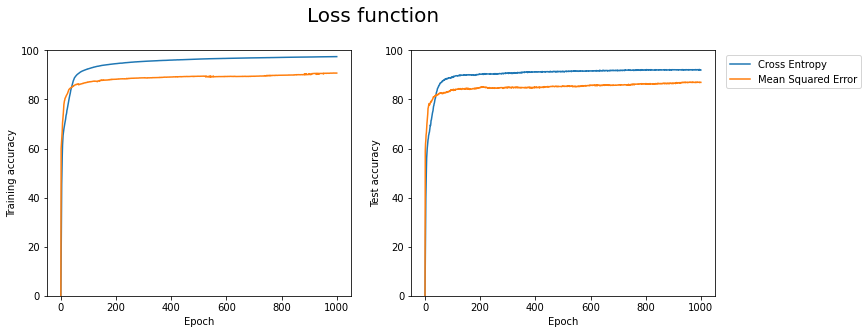

In [114]:
## loss function
# cross entropy loss
CELoss = torch.nn.CrossEntropyLoss()
# mean squared error loss
MSELoss = torch.nn.MSELoss(reduction = 'mean')

filenames = [1, 2]
loss_fn_names = ["Cross Entropy", "Mean Squared Error"]
plot_loss_fn_acc(filenames, title="Loss function", paramname=loss_fn_names)


## regularization

### L1 regularization

- Implement L1 regularization and train the model using $\lambda \in \left\{ 0.001, 0.005\right\}$. 

    Create a plot of the train accuracy, test accuracy, and generalization gap vs epoch for each $\lambda$. (3 plots, 2 lines each).


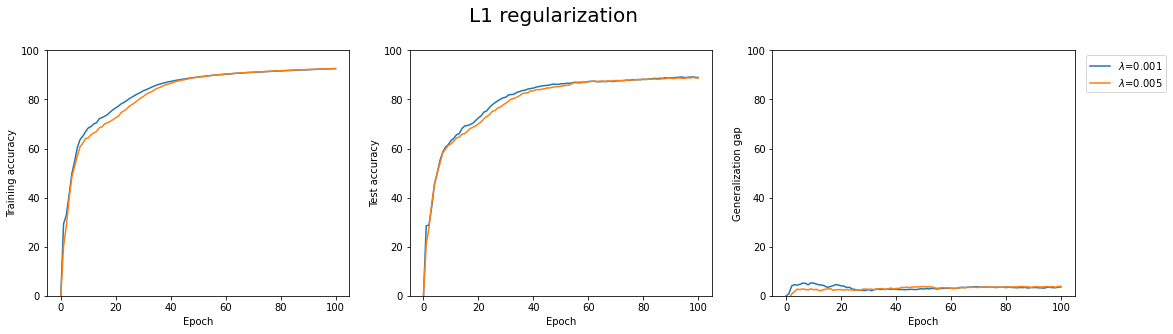

In [135]:
lambdas = [0.001, 0.005]
filenames = [3, 4]
plot_reg_accuracy(lambdas, filenames, 
                  title="L1 regularization", paramname="$\lambda$")

### L2 regularization

- Implement L2 regularization and train the model using $\lambda \in \left\{ 0.001, 0.01,0.1\right\}$. 

    Create a plot of the train accuracy, test accuracy, and generalization gap vs epoch for each $\lambda$. (3 plots, 3 lines each).

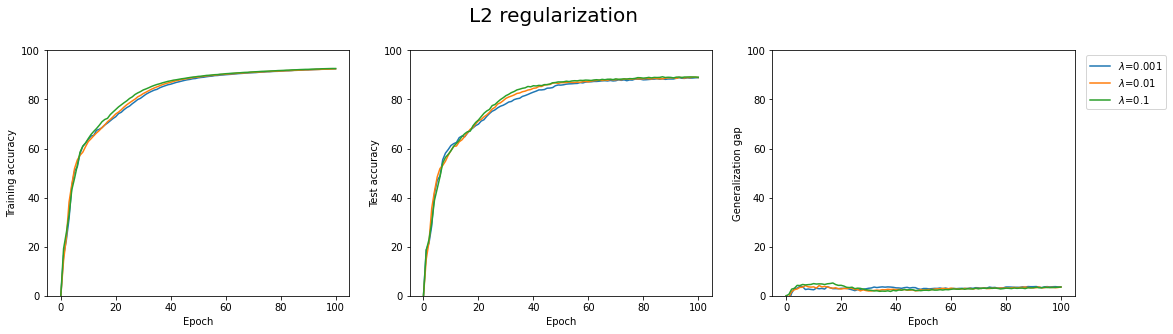

In [138]:
lambdas = [0.001, 0.01, 0.1]
filenames = [5, 6, 7]
plot_reg_accuracy(lambdas, filenames, 
                  title="L2 regularization", paramname="$\lambda$")

### dropout

- Apply dropout to both hidden layers and train the model using $p \in \left\{0.05, 0.1, 0.5\right\}$. 

    use a special  type of PyTorch layer included in  `torch.nn.Dropout()`.  
    
    Create a plot of the train accuracy, test accuracy, and generalization gap vs epoch for each p value (3 plots, 3 lines each)

https://colab.research.google.com/drive/1HO4qrZpod-w7YP-UGb9HWcX6YYf-VQOf#scrollTo=fm9P9bOZwKqQ

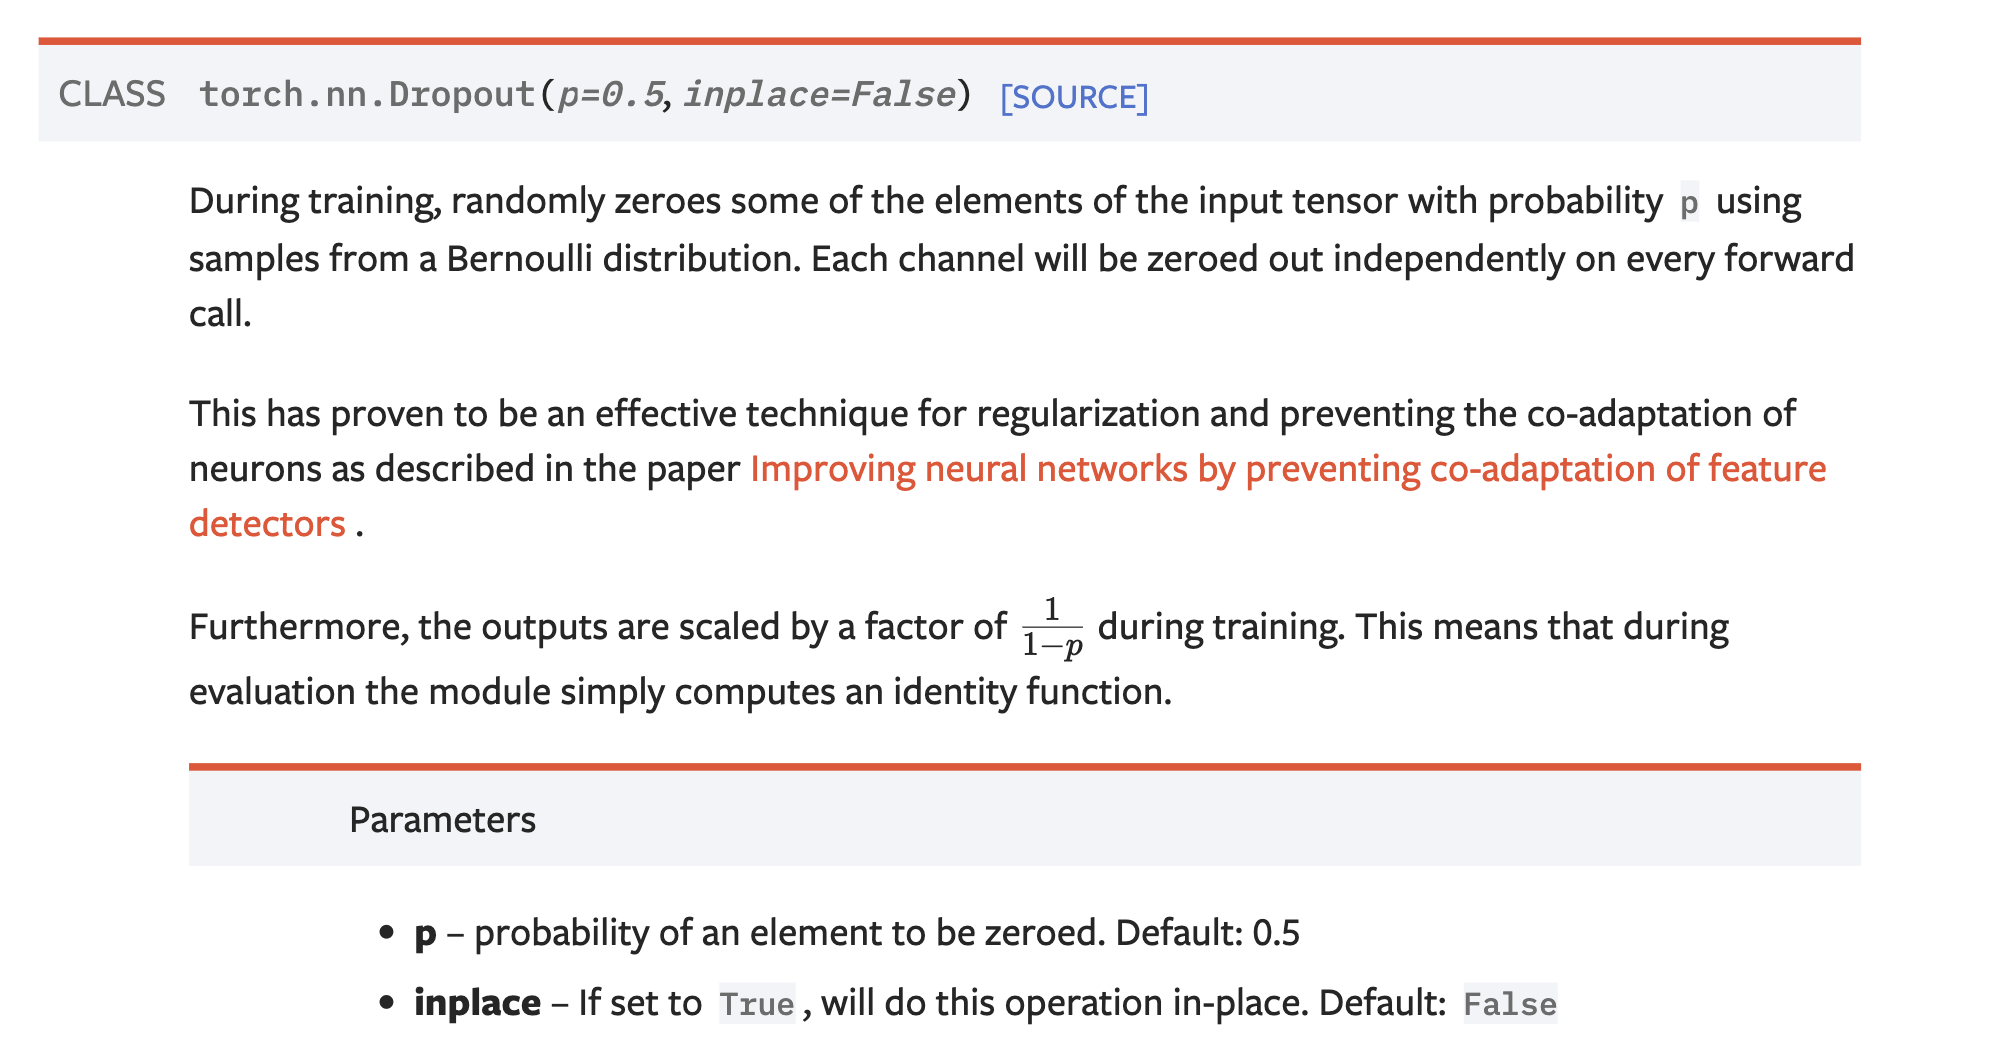

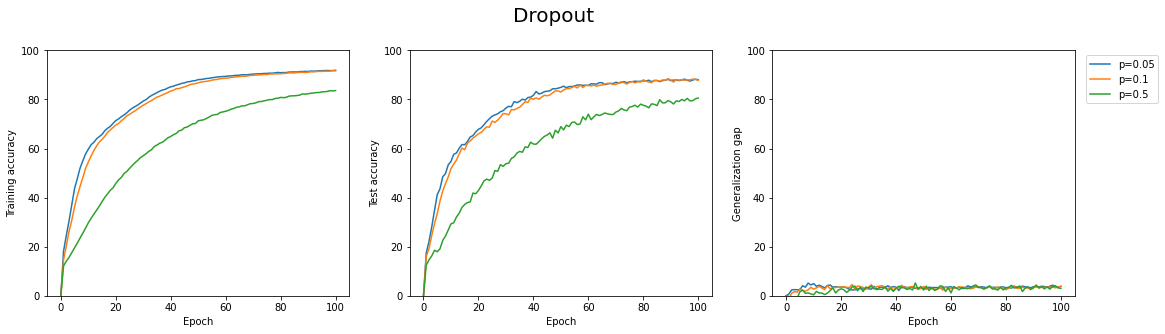

In [ ]:
ps = [0.05, 0.1,0.5]
filenames = [8, 9, 10]
plot_reg_accuracy(ps, filenames, 
                  title="Dropout", paramname="p")

### test accuracy vs epoch

- Using the loss data you've collected so far, create a plot of the test accuracy vs epoch for each of the experiments performed for prob 4.2. (8 lines, 1 plot)


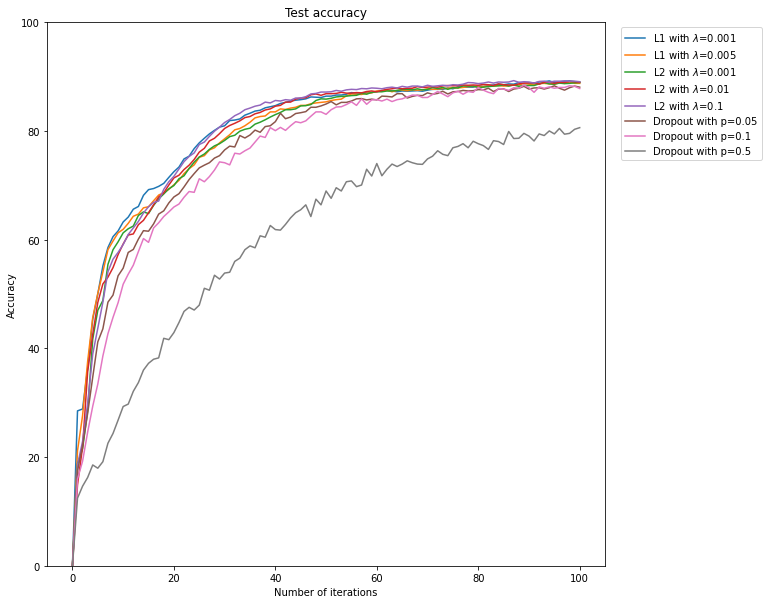

In [154]:
labels = ["L1 with $\lambda$=0.001",
          "L1 with $\lambda$=0.005",
          "L2 with $\lambda$=0.001",
          "L2 with $\lambda$=0.01",
          "L2 with $\lambda$=0.1",
          "Dropout with p=0.05",
          "Dropout with p=0.1",
          "Dropout with p=0.5"]

fig=plt.figure(figsize=(10, 10))
for i, label in enumerate(labels): 
    with open(f'/content/gdrive/MyDrive/CPSC552 hw/results/metrics{i+3}.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        # plot test accuracy
        plt.plot(acc[:,1], label=label)

plt.title("Test accuracy") 
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.ylim(0, 100) 
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.savefig(f'/content/gdrive/MyDrive/CPSC552 hw/results/all_test_accuracy.png')
plt.show()


### conclusion

- Are the final results sensitive to each parameter? 
    

- Is there any regularization method which performs best?

- The final results aren't very sensitive to which $L_p$ norm regularization and $\lambda$ we choose, both L1 and L2 performs good, but performance of drop out with $p=0.5$ falls behind the majority.

- L2 regularization with $\lambda = 0.1$ performs best